# IMAGE CLASSIFICATION OF CLOTHES
**Our challenge is to build an image classifier with Keras and Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    
 

## The Data

In [1]:
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 14s 3us/step


## Visualizing the Data

**Let's view an image from the data set.**

In [3]:
import matplotlib.pyplot as plt

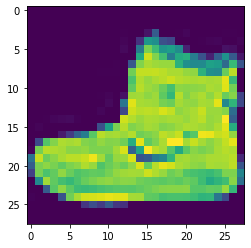

In [9]:
plt.imshow(x_train[0])

## Preprocessing the Data

**Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [11]:
x_train.max()

255

In [12]:
x_train = x_train / 255

In [13]:
x_test = x_test / 255

**Reshape the X arrays to include a 4 dimension of the single channel.**

In [17]:
import numpy as np

In [22]:
x_train = np.expand_dims(x_train, axis=3)

In [24]:
x_test = np.expand_dims(x_test, axis=3)

**Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [25]:
from tensorflow.keras.utils import to_categorical

In [26]:
y_cat_train = to_categorical(y_train) 

In [27]:
y_cat_test = to_categorical(y_test) 

## Building the Model

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [31]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


### Training the Model

In [33]:
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test))

Epoch 1/10
1875/1875 [==============================] - 34s 17ms/step - loss: 0.5332 - accuracy: 0.8120 - val_loss: 0.3209 - val_accuracy: 0.8862
Epoch 2/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2782 - accuracy: 0.8999 - val_loss: 0.2938 - val_accuracy: 0.8990
Epoch 3/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2366 - accuracy: 0.9157 - val_loss: 0.2940 - val_accuracy: 0.8987
Epoch 4/10
1875/1875 [==============================] - 39s 21ms/step - loss: 0.2084 - accuracy: 0.9252 - val_loss: 0.2780 - val_accuracy: 0.9033
Epoch 5/10
1875/1875 [==============================] - 40s 21ms/step - loss: 0.1876 - accuracy: 0.9327 - val_loss: 0.3015 - val_accuracy: 0.9019
Epoch 6/10
1875/1875 [==============================] - 37s 19ms/step - loss: 0.1729 - accuracy: 0.9383 - val_loss: 0.2939 - val_accuracy: 0.9076
Epoch 7/10
1875/1875 [==============================] - 40s 22ms/step - loss: 0.1601 - accuracy: 0.9441 - val_loss: 0.3079 -

### Evaluating the Model

**TASK 7: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

In [39]:
import pandas as pd

In [40]:
results = pd.DataFrame(model.history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,0.401104,0.857683,0.320949,0.8862
1,0.274061,0.901750,0.293841,0.8990
2,0.236705,0.914817,0.294024,0.8987
3,0.210772,0.924600,0.278044,0.9033
4,0.192170,0.930950,0.301515,0.9019


<AxesSubplot:>

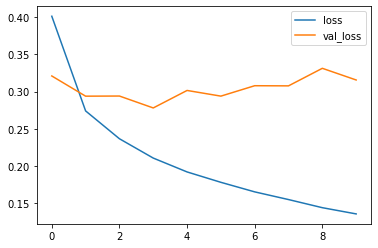

In [41]:
results[['loss','val_loss']].plot()

In [43]:
print(model.metrics_names)
print(model.evaluate(x_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[0.3155672252178192, 0.907800018787384]


In [44]:
from sklearn.metrics import classification_report

In [47]:
y_preds= np.argmax(model.predict(x_test), axis=-1)

In [49]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.80      0.90      0.85      1000
           3       0.92      0.91      0.91      1000
           4       0.86      0.85      0.86      1000
           5       0.98      0.97      0.97      1000
           6       0.79      0.70      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

